In [20]:
import numpy as np
import random
from numpy import linalg as LA
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib qt

### The backpropagation algorithm is implemented as follows:

In [48]:
def forward_pass(X, W_hi, W_jh, b_h, b_o, num_in_node, num_hid_node, num_op_node):
      
    # hidden layer
    Zh = np.dot(X.T, W_hi) + b_h  # hidden layer activation potential
    S_Zh = sigmod_fun(Zh)       # hidden layer output
    
    # Output layer
    Yj = np.dot(S_Zh, W_jh) + b_o  # output layer activation potential
    S_Yj = sigmod_fun(Yj/255)          # output layer output
    
    return Zh, Yj, S_Zh, S_Yj

def back_propagation(X, d, W_hi, W_jh, Zh, S_Zh, Yj, S_Yj, b_h, b_o, eta, num_in_node, num_hid_node, num_op_node):
    e = 2*(S_Yj - d)
    Sd_Yj = sigmod_deriv_fun(Yj)
    Sd_Zh = sigmod_deriv_fun(Zh)
    
    # output bias update
    b_o = b_o - eta*e*np.reshape(Sd_Yj,(1,num_op_node))
    
    # hidden bias update
    a = np.dot(W_jh, (e*Sd_Yj).T)
    b_h = b_h - eta*np.reshape(a, (1, num_hid_node))*Sd_Zh 
    
    # weight update input to hidden
    gam = np.sum(e*Sd_Yj*np.reshape(W_jh, (num_hid_node,1,num_op_node)), axis=2)    
    a = np.ones((num_in_node, num_hid_node))*np.reshape(gam, (1,num_hid_node))
    b = np.ones((num_in_node, num_hid_node))*np.reshape(Sd_Zh, (1,num_hid_node))
    c = np.ones((num_in_node, num_hid_node))*np.reshape(X, (num_in_node, 1))
    W_hi = W_hi - eta*np.reshape(a*b*c, (num_in_node,num_hid_node))
    
    # weight update hidden to output
    a = np.ones((num_op_node, num_hid_node))*np.reshape(e, (num_op_node,1))
    b = np.ones((num_op_node, num_hid_node))*np.reshape(Sd_Yj, (num_op_node, 1))
    c = np.ones((num_op_node, num_hid_node))*np.reshape(S_Zh, (1, num_hid_node))
    W_jh = W_jh - eta*np.reshape(a*b*c, (num_hid_node,num_op_node))

    
   
    

  
    return W_jh, W_hi, b_o, b_h

def sigmod_fun(X):
    return 1/(1+np.exp(-X))

def sigmod_deriv_fun(X):
    X_sig = sigmod_fun(X)
    Z = X_sig*(1-X_sig)
    return Z


In [22]:
def add_noise(X, d, num_data = 50):
    num_data = num_data - X.shape[0]
    X_data = X
    d_data = d
    for i in range(num_data):
#         X_data = np.append(X_data,X+random.uniform(0,0.5),axis = 0)
        X_data = np.append(X_data,X+np.random.uniform(0,0.3, size=(4,1)),axis = 0)
        d_data = np.append(d_data,d,axis = 0)
    return X_data, d_data

def compute_accuracy(S_Y, d_test):
    S_Yt = np.zeros((S_Y.shape[0], S_Y.shape[1]))
    
    for i in range(S_Y.shape[0]):
        if S_Y[i] < 0.5:
            S_Yt[i] = 0
        else:
            S_Yt[i] = 1
    
    err = abs(S_Yt-d_test)
    err = (np.sum(err)/len(d_test))*100
    return err


In [50]:
c = np.load('mnist.npz') 
X_train = c['x_train']
Y_train = c['y_train']
X_Data = np.reshape(X_train, (60000, 28*28) )/255
X = X_Data[0:5,:]
d = X
X_test = X_Data[6:10,:]
d_test = X_test

epochs = 10
eta = 0.1
num_in_node, num_hid_node, num_op_node = 28*28,int(28*28/2),28*28

# initialize weights and biases
W_hi = np.random.uniform(size = (num_in_node,num_hid_node))
W_jh = np.random.uniform(size = (num_hid_node,num_op_node))
b_h = np.random.uniform(size = (1,num_hid_node))
b_o = np.random.uniform(size = (1,num_op_node))

Zh, Yj, S_Zh, S_Yj = forward_pass(X[0], W_hi, W_jh, b_h, b_o, num_in_node, num_hid_node, num_op_node)
print(S_Yj)


# error_epoch = np.zeros((epochs,1))
# print('training in progress..............')
# for i in range(epochs):
#     error = 0
#     for j in range(X.shape[0]):
#         Zh, Yj, S_Zh, S_Yj = forward_pass(X[j], W_hi, W_jh, b_h, b_o, num_in_node, num_hid_node, num_op_node)
#         print(X[j].shape)
#         W_jh, W_hi, b_o, b_h = back_propagation(X[j], d[j], W_hi, W_jh, Zh, S_Zh, Yj, S_Yj, b_h, b_o, eta, num_in_node, num_hid_node, num_op_node)
#         error += 0.5*np.dot((S_Yj - d[j]), (S_Yj - d[j]).T)
#     error_epoch[i] = error
#     print(error_epoch[i])
        
# print('training completed ...............')
        


[[0.68680985 0.68362638 0.68084448 0.67698575 0.68005284 0.68616954
  0.68444477 0.67908227 0.66879961 0.67948718 0.68029384 0.67712218
  0.68752588 0.67955169 0.68660392 0.68584939 0.67975997 0.67856889
  0.67390181 0.67767293 0.68079176 0.686962   0.6817111  0.68040783
  0.68721504 0.68078761 0.68545015 0.68363819 0.68039371 0.68735527
  0.68328395 0.68781177 0.68592028 0.68130283 0.68244642 0.68762792
  0.67828854 0.68665411 0.68992833 0.68503982 0.67688854 0.6886344
  0.69143967 0.68884098 0.68314052 0.6752936  0.68284319 0.68927698
  0.68438649 0.68490206 0.68257932 0.67529574 0.67818273 0.68368859
  0.68379642 0.68623554 0.6965252  0.68561893 0.68320761 0.67826699
  0.68781125 0.69186485 0.68721008 0.6835274  0.68041833 0.68600075
  0.68378046 0.68996935 0.68762534 0.6804875  0.67745774 0.68204636
  0.68464026 0.68863031 0.67544307 0.68656914 0.68552566 0.69133782
  0.68729454 0.68426282 0.6888031  0.68816621 0.68052472 0.68008862
  0.68463711 0.68234863 0.68440653 0.67825702 0.6

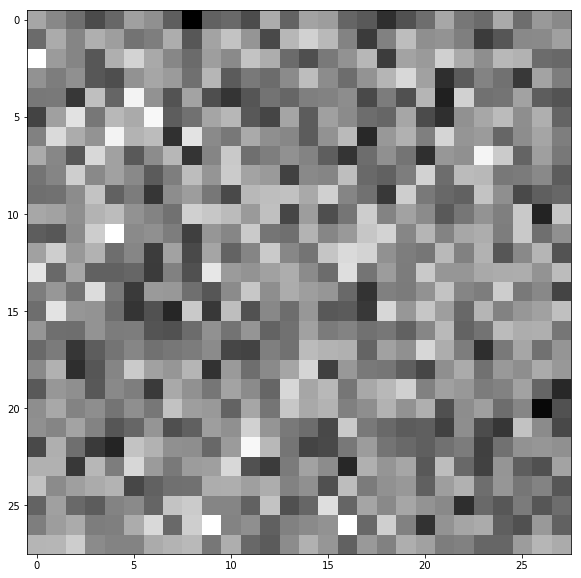

In [51]:
# plt.figure(figsize=(20, 10))
# plt.plot(error_epoch)
# i = 10
# j = 15
# print('testing on data: \n', X_test[i:j, :], '\n')
# print('Actual output: \n', d_test[i:j], '\n')
# Zh, Yj, S_Zh, S_Yj = forward_pass(X[0], W_hi, W_jh, b_h, b_o, num_in_node, num_hid_node, num_op_node)
plt.figure(figsize=(20, 10))
plt.imshow(np.reshape(S_Yj*255, (28,28)), cmap = "gray")
plt.show()
# print('Predicted output: \n',S_Yj, '\n')

In [ ]:
# Zh, Yj, S_Zh, S_Yj = forward_pass(X_test, W_hi, W_jh, b_h, b_o, num_in_node, num_hid_node, num_op_node)
# plt.figure(figsize=(20, 10))
# plt.plot(d_test, 'b o' , markersize = 20)
# plt.plot(S_Yj, 'r.', markersize = 20)

In [31]:
print(X)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         